In [17]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

from src.data import load_dataset

X, y = load_dataset()

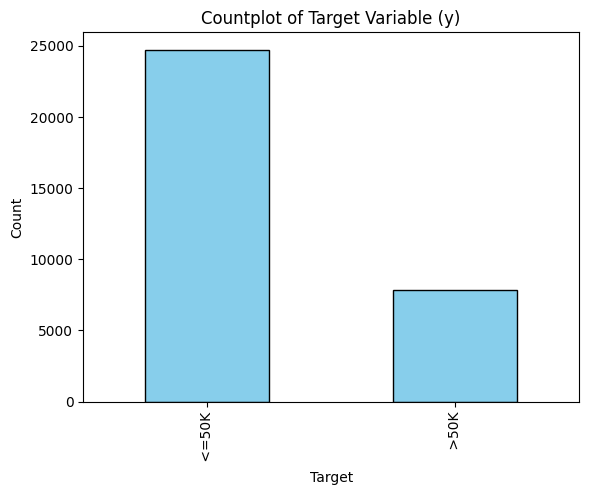

In [18]:
y.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Countplot of Target Variable (y)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

top_features = feature_importances.nlargest(10)
print(top_features)

fnlwgt                                0.171545
age                                   0.152671
education_num                         0.113884
capital-gain                          0.103144
hours-per-week                        0.084454
marital-status_ Married-civ-spouse    0.080402
marital-status_ Never-married         0.034315
capital-loss                          0.032587
occupation_ Exec-managerial           0.020013
relationship_ Not-in-family           0.019669
dtype: float64


In [14]:
least_important_features = feature_importances.nsmallest(10)
print(least_important_features)

native-country_ Holand-Netherlands            2.380024e-08
workclass_ Never-worked                       5.276702e-06
native-country_ Honduras                      5.351179e-06
occupation_ Armed-Forces                      2.407157e-05
native-country_ Outlying-US(Guam-USVI-etc)    3.533131e-05
native-country_ Scotland                      5.791992e-05
native-country_ Thailand                      6.696628e-05
workclass_ Without-pay                        7.279698e-05
native-country_ Peru                          8.622200e-05
native-country_ Laos                          8.826218e-05
dtype: float64


<Axes: title={'center': 'fnlwgt Distribution'}, ylabel='Frequency'>

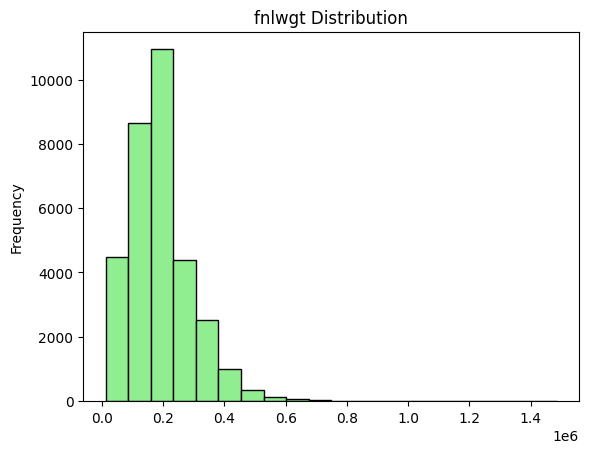

In [ ]:
X['fnlwgt'].plot(kind='hist', bins=20, title='fnlwgt Distribution', color='lightgreen', edgecolor='black')

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

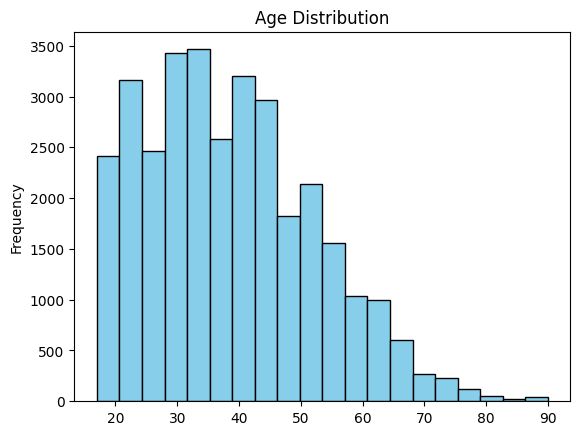

In [3]:
X['age'].plot(kind='hist', bins=20, title='Age Distribution', color='skyblue', edgecolor='black')

<Axes: title={'center': 'Education Number Distribution'}, ylabel='Frequency'>

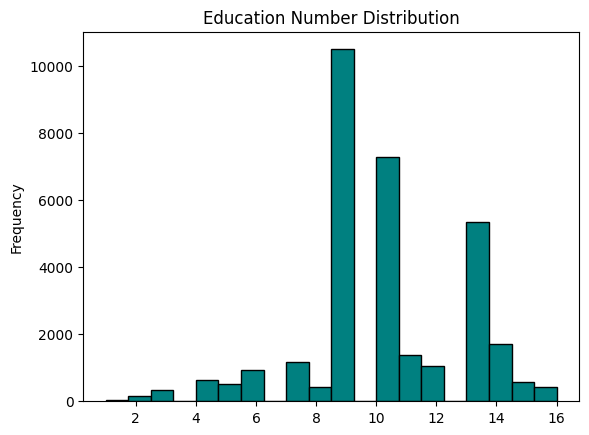

In [ ]:
X['education_num'].plot(kind='hist', bins=20, title='Education Number Distribution', color='teal', edgecolor='black')

In [5]:
X['capital-gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

<Axes: title={'center': 'Capital Gain Distribution (Non-Zero)'}, ylabel='Frequency'>

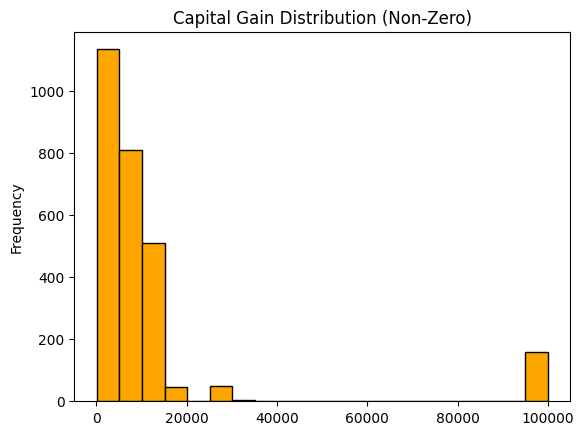

In [6]:
X_non_zero = X[X['capital-gain'] > 0]
X_non_zero['capital-gain'].plot(kind='hist', bins=20, title='Capital Gain Distribution (Non-Zero)', color='orange', edgecolor='black')

<Axes: title={'center': 'Hours per Week Distribution'}, ylabel='Frequency'>

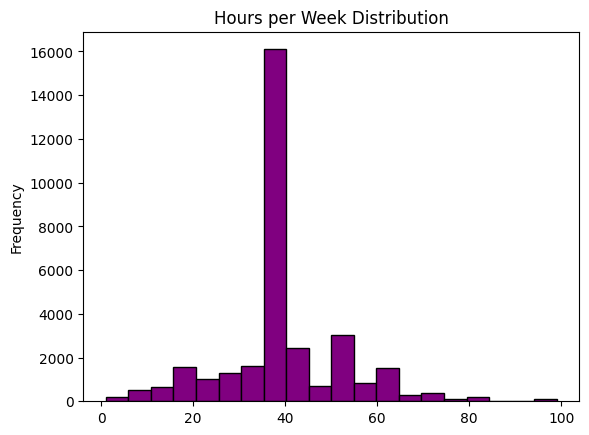

In [7]:
X['hours-per-week'].plot(kind='hist', bins=20, title='Hours per Week Distribution', color='purple', edgecolor='black')